In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df = pd.read_csv('datasets/lab2_q2.csv')
df.head()

,1.0000,2.6487,4.5192
0,1.0,1.5438,2.4443
1,1.0,1.8990,4.2409
2,1.0,2.4711,5.8097
3,1.0,3.3590,6.4423
4,1.0,3.2406,5.8097


In [4]:
df.columns = ['Y', 'Feature1', 'Feature2']
df.head()

,Y,Feature1,Feature2
0,1.0,1.5438,2.4443
1,1.0,1.8990,4.2409
2,1.0,2.4711,5.8097
3,1.0,3.3590,6.4423
4,1.0,3.2406,5.8097


In [3]:
# getting the dimension
df.shape

(99, 3)

In [6]:
# splitting the data
X_train, y_train = df.iloc[0:70, 1:], df.iloc[0:70, 0].values.reshape(-1, 1)
X_val, y_val = df.iloc[70:85, 1:], df.iloc[70:85, 0].values.reshape(-1, 1)
X_test, y_test = df.iloc[85:100, 1:], df.iloc[85:100, 0].values.reshape(-1, 1)

# getting shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape) 

(((70, 2), (70, 1)), ((14, 2), (14, 1)), ((15, 2), (15, 1)))

In [7]:
theta = np.zeros((3, 1))
alpha = 0.01
epochs = 1000  
# adding 1 column
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))  
    loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

def accuracy(X, y, theta):
    h = sigmoid(X.dot(theta)) >= 0.5
    accuracy = np.mean(h == y) * 100
    return accuracy

Iteration 0: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 100: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 200: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 300: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 400: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 500: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 600: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 700: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 800: Train Accuracy = 38.57%, Validation Accuracy = 0.00%
Iteration 900: Train Accuracy = 38.57%, Validation Accuracy = 0.00%


/tmp/ipykernel_123126/3990859864.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
/tmp/ipykernel_123126/3990859864.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


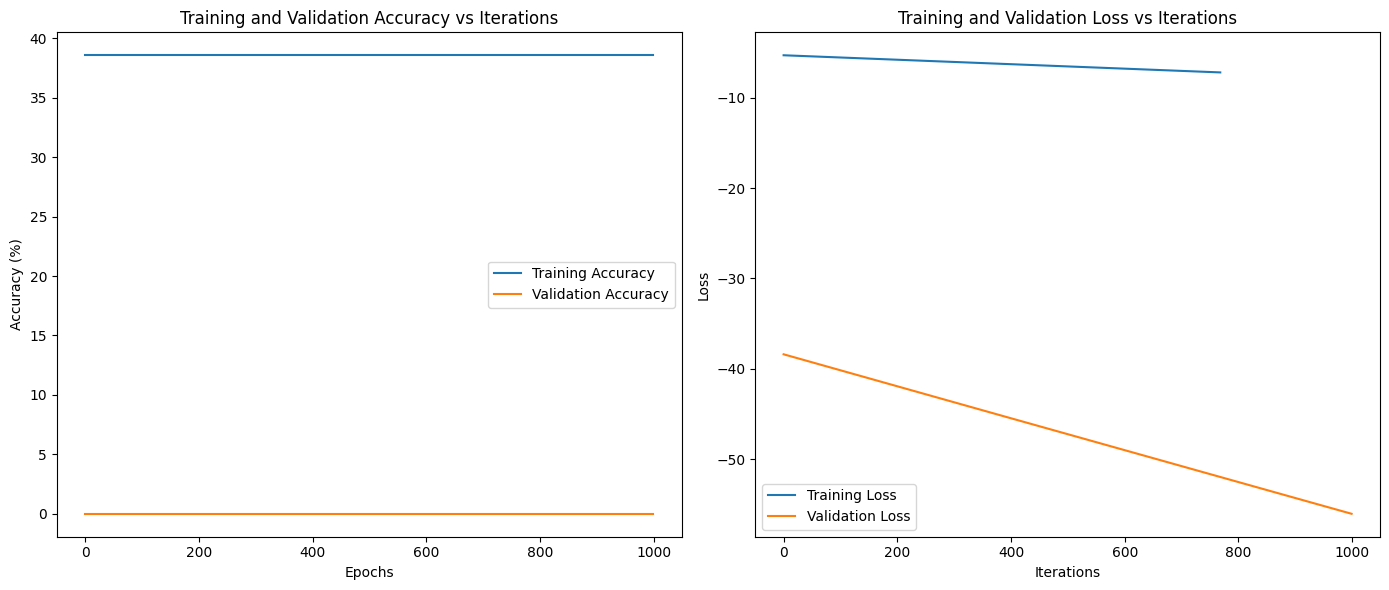

Final Training Accuracy: 38.57%
Final Validation Accuracy: 0.00%


In [14]:
training_accuracy = []
validation_accuracy = []
training_loss = []
validation_loss = []

# gradient descent
for i in range(epochs):
    h_train = sigmoid(X_train.dot(theta))
    gradient = X_train.T.dot(h_train - y_train) / len(y_train)
    theta -= alpha * gradient
    
    #validation accuracy and loss at each iteration
    train_acc = accuracy(X_train, y_train, theta)
    val_acc = accuracy(X_val, y_val, theta)
    
    train_loss = loss(X_train, y_train, theta)
    val_loss = loss(X_val, y_val, theta)
    
    training_accuracy.append(train_acc)
    validation_accuracy.append(val_acc)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Train Accuracy = {train_acc:.2f}%, Validation Accuracy = {val_acc:.2f}%")

# Plotting the results
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), training_accuracy, label='Training Accuracy')
plt.plot(range(epochs), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy vs Iterations')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), training_loss, label='Training Loss')
plt.plot(range(epochs), validation_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Final results
print(f"Final Training Accuracy: {training_accuracy[-1]:.2f}%")
print(f"Final Validation Accuracy: {validation_accuracy[-1]:.2f}%")

In [15]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == -1) & (y_pred == -1))
    FP = np.sum((y_true == -1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == -1))
    return TP, TN, FP, FN

def precision(TP, FP):
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(TP, FN):
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def evaluate_model(X, y, theta, thresholds=np.arange(0, 1.05, 0.05)):
    y_pred_probs = sigmoid(X.dot(theta)) 
    precision_vals = []
    recall_vals = []
    f1_vals = []
    
    for threshold in thresholds:
        y_pred = np.where(y_pred_probs >= threshold, 1, -1)
        
        TP, TN, FP, FN = confusion_matrix(y, y_pred)
        
        precision_val = precision(TP, FP)
        recall_val = recall(TP, FN)
        f1_val = f1_score(precision_val, recall_val)
        
        precision_vals.append(precision_val)
        recall_vals.append(recall_val)
        f1_vals.append(f1_val)
    
    return precision_vals, recall_vals, f1_vals, y_pred_probs

def accuracy(X, y, theta):
    h = sigmoid(X.dot(theta)) >= 0.5  
    accuracy = np.mean(h == y) * 100
    return accuracy

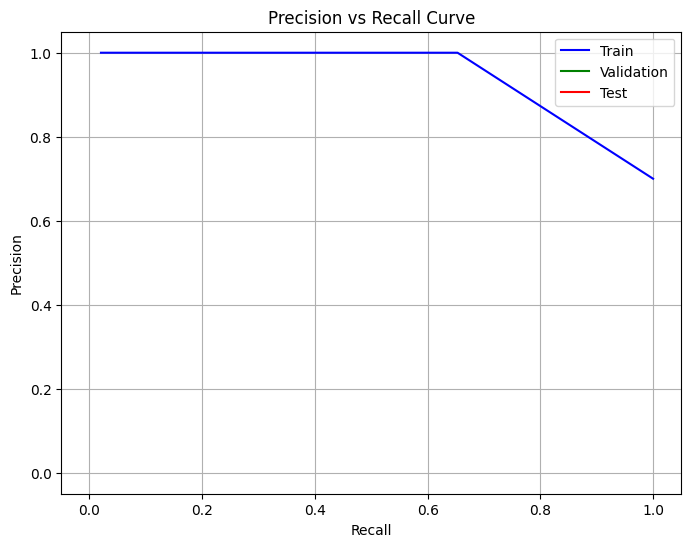

Final Training Accuracy: 38.57%
Final Validation Accuracy: 0.00%
Final Test Accuracy: 0.00%
Training Set Metrics:


ValueError: shapes (70,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [16]:
train_precision, train_recall, train_f1, train_probs = evaluate_model(X_train, y_train, theta)
val_precision, val_recall, val_f1, val_probs = evaluate_model(X_val, y_val, theta)
test_precision, test_recall, test_f1, test_probs = evaluate_model(X_test, y_test, theta)

plt.figure(figsize=(8, 6))

plt.plot(train_recall, train_precision, label="Train", color='blue')
plt.plot(val_recall, val_precision, label="Validation", color='green')
plt.plot(test_recall, test_precision, label="Test", color='red')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

train_acc = accuracy(X_train, y_train, theta)
val_acc = accuracy(X_val, y_val, theta)
test_acc = accuracy(X_test, y_test, theta)

print(f"Final Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Accuracy: {val_acc:.2f}%")
print(f"Final Test Accuracy: {test_acc:.2f}%")

def print_metrics(y_true, y_pred_probs, y_true_label):
    thresholds = np.arange(0, 1.05, 0.05)
    precision_vals, recall_vals, f1_vals, y_pred_probs = evaluate_model(y_true, y_pred_probs, theta)
    for i, threshold in enumerate(thresholds):
        print(f"Threshold: {threshold:.2f}")
        TP, TN, FP, FN = confusion_matrix(y_true, y_pred_probs >= threshold)
        print(f"Confusion Matrix: TP={TP}, TN={TN}, FP={FP}, FN={FN}")
        print(f"Precision: {precision_vals[i]:.4f}")
        print(f"Recall: {recall_vals[i]:.4f}")
        print(f"F1 Score: {f1_vals[i]:.4f}")
        print()

print("Training Set Metrics:")
print_metrics(y_train, train_probs, theta)
print("Validation Set Metrics:")
print_metrics(y_val, val_probs, theta)
print("Test Set Metrics:")
print_metrics(y_test, test_probs, theta)